**IMPORTING** **LIBRARIES**

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)

np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

**IMPORTING** **DATA**

In [3]:
train = pd.read_csv("/content/drive/MyDrive/IDS_train.csv")
test = pd.read_csv("/content/drive/MyDrive/IDS_test.csv")

**DATA** **DESCRIPTION**

In [4]:
train.head()

,ID,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,22,1420155,37,46,2634,7062,408,0,71.189189,103.527194,976,0,153.521739,306.211818,6827.423767,58.444325,1.731896e+04,1.061066e+05,953414,0,1420155,39448.75,1.682052e+05,995622,3,466571,10368.24444,23078.02737,106355,1,0,0,0,0,764,944,26.053494,32.390831,0,976,115.428571,239.421657,5.732273e+04,0,0,0,1,0,0,0,0,1,116.819277,71.189189,153.521739,764,0,0,0,0,0,0,37,2634,46,7062,8192,245,35,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,1,80,63122325,7,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.110896,1.050000e+07,1.190000e+07,32100000,998805,63100000,10500000.00,1.190000e+07,32100000,998805,0,0.00000,0.00000,0,0,0,0,0,0,280,0,0.110896,0.000000,0,0,0.000000,0.000000,0.000000e+00,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0.000000,280,0,0,0,0,0,0,7,0,0,0,29200,-1,0,40,7010762.0,0.0,7010762,7010762,18700000.0,12200000.0,32100000,8015920,DoS Slowhttptest
2,2,80,85039076,6,6,347,11595,347,0,57.833333,141.662157,5792,0,1932.500000,2181.008184,140.429560,0.141112,7.730825e+06,2.560000e+07,84900000,1,84900000,17000000.00,3.800000e+07,84900000,1,153411,30682.20000,60418.07800,138145,45,0,0,0,0,200,200,0.070556,0.070556,0,5792,918.615385,1716.139686,2.945135e+06,0,0,0,0,1,0,0,0,1,995.166667,57.833333,1932.500000,200,0,0,0,0,0,0,6,347,6,11595,251,235,1,32,4.0,0.0,4,4,84900000.0,0.0,84900000,84900000,DoS Hulk
3,3,443,5379977,5,1,135,46,46,6,27.000000,20.124612,46,46,46.000000,0.000000,33.643266,1.115246,1.075995e+06,2.342474e+06,5266022,4,5379977,1344994.25,2.614504e+06,5266022,4,0,0.00000,0.00000,0,0,1,0,0,0,100,20,0.929372,0.185874,6,46,32.428571,18.866700,3.559524e+02,0,1,0,0,1,0,0,0,0,37.833333,27.000000,46.000000,100,0,0,0,0,0,0,5,135,1,46,258,360,4,20,109172.0,0.0,109172,109172,5266022.0,0.0,5266022,5266022,BENIGN
4,4,80,84220258,8,5,326,11595,320,0,40.750000,112.853571,8688,0,2319.000000,3774.237539,141.545518,0.154357,7.018355e+06,2.430000e+07,84100000,1,84100000,12000000.00,3.180000e+07,84100000,1,146592,36648.00000,64691.87929,133266,190,0,0,0,0,252,168,0.094989,0.059368,0,8688,851.500000,2382.952040,5.678460e+06,0,0,0,0,1,0,0,0,0,917.000000,40.750000,2319.000000,252,0,0,0,0,0,0,8,326,5,11595,274,235,2,20,1976.0,0.0,1976,1976,84100000.0,0.0,84100000,84100000,DoS Hulk


In [5]:
test.head()

,ID,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,80,99575743,7,5,401,11595,377,0,57.285714,141.009118,7240,0,2319.000000,3331.638186,120.471107,0.120511,9.052340e+06,30000000.0,99400000,1,99400000,16600000.0,40600000.0,99400000,1,154358,38589.5,6.935500e+04,142292,85,0,0,0,0,184,168,0.070298,0.050213,0,7240,923.230769,2242.575720,5029145.859,1,0,0,0,0,0,0,0,0,1000.166667,57.285714,2319.000000,184,0,0,0,0,0,0,7,401,5,11595,0,235,4,20,11993.0,0.0,11993,11993,99400000.0,0.0,99400000,99400000
1,1,80,107429687,2,1,662,6,662,0,331.000000,468.104689,6,6,6.000000,0.000000,6.218021,0.027925,5.370000e+07,76000000.0,107000000,47,107000000,107000000.0,0.0,107000000,107000000,0,0.0,0.000000e+00,0,0,0,0,0,0,64,20,0.018617,0.009308,0,662,167.000000,330.012121,108908.000,0,0,0,0,1,0,0,0,0,222.666667,331.000000,6.000000,64,0,0,0,0,0,0,2,662,1,6,410,0,1,32,0.0,0.0,0,0,107000000.0,0.0,107000000,107000000
2,2,80,17291,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,694.002660,115.667110,1.729100e+04,0.0,17291,17291,17291,17291.0,0.0,17291,17291,0,0.0,0.000000e+00,0,0,0,0,0,0,40,0,115.667110,0.000000,6,6,6.000000,0.000000,0.000,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,253,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0
3,3,80,85038140,5,7,338,11595,326,0,67.600000,144.481141,5792,0,1656.428571,2119.480114,140.325271,0.141113,7.730740e+06,25600000.0,84900000,24,84900000,21200000.0,42400000.0,84900000,985,85000000,14200000.0,3.460000e+07,84900000,52,0,0,0,0,144,232,0.058797,0.082316,0,5792,918.384615,1715.159251,2941771.256,1,0,0,0,0,0,0,0,1,994.916667,67.600000,1656.428571,144,0,0,0,0,0,0,5,338,7,11595,0,235,2,20,12007.0,0.0,12007,12007,84900000.0,0.0,84900000,84900000
4,4,80,82963302,8,6,375,11595,363,0,46.875000,127.762545,4344,0,1932.500000,1977.812908,144.280660,0.168749,6.381792e+06,23000000.0,82800000,1,82800000,11800000.0,31300000.0,82800000,1,145575,29115.0,5.897574e+04,134278,54,0,0,0,0,240,200,0.096428,0.072321,0,4344,798.000000,1524.697581,2324702.714,0,0,0,0,1,0,0,0,0,855.000000,46.875000,1932.500000,240,0,0,0,0,0,0,8,375,6,11595,251,235,3,20,1983.0,0.0,1983,1983,82800000.0,0.0,82800000,82800000


In [6]:
train.describe()

,ID,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,129879.000000,129879.000000,1.298790e+05,129879.000000,129879.000000,1.298790e+05,1.298790e+05,129879.000000,129879.000000,129879.000000,129879.000000,129879.000000,129879.000000,129879.000000,129879.000000,1.296790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,129879.000000,129879.0,129879.0,129879.0,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,129879.000000,129879.000000,129879.000000,129879.000000,1.298790e+05,129879.000000,129879.000000,129879.000000,129879.000000,129879.000000,129879.000000,129879.0,129879.000000,129879.000000,129879.000000,129879.000000,129879.000000,1.298790e+05,129879.0,129879.0,129879.0,129879.0,129879.0,129879.0,129879.000000,1.298790e+05,129879.000000,1.298790e+05,129879.000000,129879.000000,129879.000000,129879.000000,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05,1.298790e+05
mean,64939.000000,5714.908638,2.808619e+07,8.522710,8.925400,5.393826e+02,1.417065e+04,233.075054,15.097190,60.403257,82.642752,1660.832190,33.744624,552.530111,658.590425,inf,inf,2.520805e+06,6.865177e+06,2.295862e+07,2.320982e+05,2.783185e+07,5.100468e+06,9.036617e+06,2.286408e+07,1.052415e+06,1.388223e+07,2.639427e+06,3.520018e+06,9.291021e+06,9.185276e+05,0.042324,0.0,0.0,0.0,2.199637e+02,2.236889e+02,9.588483e+04,4.229337e+03,13.700313,1723.988682,278.364947,523.223824,8.874053e+05,0.097137,0.042324,0.000331,0.191817,0.419075,0.066400,0.0,0.000331,0.555902,305.776309,60.403257,552.530111,2.199637e+02,0.0,0.0,0.0,0.0,0.0,0.0,8.522710,5.393826e+02,8.925400,1.417215e+04,5226.147353,1467.087813,5.149470,26.770787,8.927445e+04,4.542519e+04,1.568155e+05,6.182056e+04,2.218634e+07,4.709707e+05,2.259182e+07,2.181069e+07
std,37492.982143,15752.583680,4.282575e+07,592.895904,777.866547,5.086162e+03,1.815935e+06,596.636120,52.801167,157.163962,224.664317,2611.731075,63.684820,798.285730,1098.132352,NaN,NaN,5.669330e+06,1.178674e+07,3.845392e+07,3.759533e+06,4.282921e+07,1.112245e+07,1.603360e+07,3.849653e+07,8.967465e+06,3.339400e+07,9.588156e+06,1.074650e+07,2.616082e+07,8.104698e+06,0.201328,0.0,0.0,0.0,1.228233e+04,1.556471e+04,3.207916e+05,3.346090e+04,27.171803,2630.822088,369.301364,783.344304,1.749497e+06,0.296145,0.201328,0.018193,0.393731,0.493410,0.248981,0.0,0.018193,0.558569,398.204946,157.163962,798.285730,1.228233e+04,0.0,0.0,0.0,0.0,0.0,0.0,592.895904,5.086162e+03,777.866547,1.816409e+06,11757.034621,7320.190914,569.744382,6.312032,6.732218e+05,4.730384e+05,1.037478e+06,5.756609e+05,3.818165e+07,4.478192e+06,3.853675e+07,3.813624

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129879 entries, 0 to 129878
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           129879 non-null  int64  
 1   Destination Port             129879 non-null  int64  
 2   Flow Duration                129879 non-null  int64  
 3   Total Fwd Packets            129879 non-null  int64  
 4   Total Backward Packets       129879 non-null  int64  
 5   Total Length of Fwd Packets  129879 non-null  int64  
 6   Total Length of Bwd Packets  129879 non-null  int64  
 7   Fwd Packet Length Max        129879 non-null  int64  
 8   Fwd Packet Length Min        129879 non-null  int64  
 9   Fwd Packet Length Mean       129879 non-null  float64
 10  Fwd Packet Length Std        129879 non-null  float64
 11  Bwd Packet Length Max        129879 non-null  int64  
 12  Bwd Packet Length Min        129879 non-null  int64  
 13 

In [8]:
test.describe()

,ID,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,43294.000000,43294.000000,4.329400e+04,43294.000000,43294.000000,4.329400e+04,4.329400e+04,43294.000000,43294.000000,43294.000000,43294.000000,43294.000000,43294.000000,43294.000000,43294.000000,4.323800e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,43294.000000,43294.0,43294.0,43294.0,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,43294.000000,43294.000000,43294.000000,43294.000000,4.329400e+04,43294.000000,43294.000000,43294.000000,43294.000000,43294.000000,43294.000000,43294.0,43294.000000,43294.000000,43294.000000,43294.000000,43294.000000,4.329400e+04,43294.0,43294.0,43294.0,43294.0,43294.0,43294.0,43294.000000,4.329400e+04,43294.000000,4.329400e+04,43294.000000,43294.000000,43294.000000,43294.000000,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04,4.329400e+04
mean,21646.500000,5706.111886,2.765915e+07,14.791195,17.241650,5.718862e+02,3.183627e+04,235.884903,15.233058,61.010934,83.455097,1648.713586,33.979859,547.113088,653.173896,inf,inf,2.476781e+06,6.735915e+06,2.259025e+07,2.378365e+05,2.740262e+07,4.994544e+06,8.905108e+06,2.249894e+07,1.004639e+06,1.367126e+07,2.559681e+06,3.475430e+06,9.154402e+06,8.668375e+05,0.041692,0.0,0.0,0.0,3.502907e+02,3.897261e+02,9.893964e+04,4.123372e+03,13.774911,1715.128932,276.752006,520.184099,8.838457e+05,0.095926,0.041692,0.000346,0.194623,0.416409,0.066245,0.0,0.000346,0.556959,304.113662,61.010934,547.113088,3.502907e+02,0.0,0.0,0.0,0.0,0.0,0.0,14.791195,5.718862e+02,17.241650,3.183453e+04,5319.649189,1466.705155,11.186030,26.764355,9.100477e+04,4.761659e+04,1.614627e+05,6.194041e+04,2.182980e+07,4.737498e+05,2.223938e+07,2.145437e+07
std,12498.045614,15735.386218,4.255524e+07,1226.536554,1629.427964,8.065294e+03,3.562490e+06,611.622942,54.143584,159.893855,230.567296,2610.235954,65.733615,795.028850,1097.622527,NaN,NaN,5.727264e+06,1.165134e+07,3.819267e+07,3.949765e+06,4.255600e+07,1.094072e+07,1.591988e+07,3.823703e+07,8.771905e+06,3.310641e+07,9.284031e+06,1.062270e+07,2.592796e+07,7.795936e+06,0.199886,0.0,0.0,0.0,2.576971e+04,3.259108e+04,3.294697e+05,2.989793e+04,26.547521,2631.290122,368.765083,783.106116,1.752576e+06,0.294492,0.199886,0.018611,0.395915,0.492969,0.248712,0.0,0.018611,0.552408,397.982360,159.893855,795.028850,2.576971e+04,0.0,0.0,0.0,0.0,0.0,0.0,1226.536554,8.065294e+03,1629.427964,3.562362e+06,11895.526823,7285.289969,1173.114244,6.343056,6.685344e+05,4.952508e+05,1.061285e+06,5.616665e+05,3.794253e+07,4.466625e+06,3.830083e+07,3.789350e+07
min,0.000000,0.000000,-1.0000

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43294 entries, 0 to 43293
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           43294 non-null  int64  
 1   Destination Port             43294 non-null  int64  
 2   Flow Duration                43294 non-null  int64  
 3   Total Fwd Packets            43294 non-null  int64  
 4   Total Backward Packets       43294 non-null  int64  
 5   Total Length of Fwd Packets  43294 non-null  int64  
 6   Total Length of Bwd Packets  43294 non-null  int64  
 7   Fwd Packet Length Max        43294 non-null  int64  
 8   Fwd Packet Length Min        43294 non-null  int64  
 9   Fwd Packet Length Mean       43294 non-null  float64
 10  Fwd Packet Length Std        43294 non-null  float64
 11  Bwd Packet Length Max        43294 non-null  int64  
 12  Bwd Packet Length Min        43294 non-null  int64  
 13  Bwd Packet Lengt

**REPLACING** **LABEL**

In [10]:
train['Label'] = train['Label'].replace(['BENIGN','DoS Slowhttptest','DoS Hulk', 'DoS GoldenEye', 'DoS slowloris'],['Normal','Attack','Attack','Attack','Attack'])

In [11]:
train['Label']

0         Normal
1         Attack
2         Attack
3         Normal
4         Attack
           ...  
129874    Attack
129875    Normal
129876    Normal
129877    Normal
129878    Normal
Name: Label, Length: 129879, dtype: object

**lABELING DATA**

In [12]:
attack_class_freq_train  = train[['Label']].apply(lambda x: x.value_counts())

attack_class_freq_train['freq_percent_train'] = round(100*attack_class_freq_train/attack_class_freq_train.sum(),2)

In [13]:
attack_class_freq_train

,Label,freq_percent_train
Normal,82428,63.47
Attack,47451,36.53


**REPLACING NAN INF VALUES **

In [14]:
train=train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
test=test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [15]:
x = train['Label']
test['Label'] = x
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43294 entries, 0 to 43293
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           43294 non-null  int64  
 1   Destination Port             43294 non-null  int64  
 2   Flow Duration                43294 non-null  int64  
 3   Total Fwd Packets            43294 non-null  int64  
 4   Total Backward Packets       43294 non-null  int64  
 5   Total Length of Fwd Packets  43294 non-null  int64  
 6   Total Length of Bwd Packets  43294 non-null  int64  
 7   Fwd Packet Length Max        43294 non-null  int64  
 8   Fwd Packet Length Min        43294 non-null  int64  
 9   Fwd Packet Length Mean       43294 non-null  float64
 10  Fwd Packet Length Std        43294 non-null  float64
 11  Bwd Packet Length Max        43294 non-null  int64  
 12  Bwd Packet Length Min        43294 non-null  int64  
 13  Bwd Packet Lengt

In [16]:
X_train = train.drop('Label', axis=1)
Y_train = train.loc[:,['Label']]
X_test = test.drop('Label', axis=1)
Y_test = test.loc[:,['Label']]

**LABEL ENCODING**

In [17]:
from sklearn import preprocessing


le = preprocessing.LabelEncoder()

lb = preprocessing.LabelBinarizer()

In [18]:
Y_train['Label'] = le.fit_transform(Y_train['Label'])
lb.fit_transform(Y_train['Label'])

Y_test['Label'] = le.fit_transform(Y_test['Label'])
lb.fit_transform(Y_test['Label'])

Y_train.describe()

,Label
count,129879.000000
mean,0.634652
std,0.481529
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


**LINEAR REGRESSION**

In [19]:
from sklearn import linear_model
LR = linear_model.LinearRegression()


LR.fit(X_train, Y_train)
lr_score = LR.score(X_test, Y_test)
print('Linear regression processing ,,,')
print('Linear regression Score: %.2f %%' % lr_score)

Linear regression processing ,,,
Linear regression Score: -0.79 %


**CLASSIFIERS**

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=1.0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_features='auto')

In [22]:
y_train = Y_train['Label'].ravel()
x_train = X_train.values
x_test = X_test.values

**ADABOOST CLASSIFIER**

In [23]:
AB.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [24]:
AB_feature = AB.feature_importances_
AB_feature

ab_score = AB.score(X_test, Y_test)

print('AdaBoostClassifier processing ,,,')
print('AdaBoostClassifier Score: %.3f %%' % ab_score)

AdaBoostClassifier processing ,,,
AdaBoostClassifier Score: 0.538 %


**RANDOM FOREST CLASSIFIER**

In [25]:
RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [26]:
RF_feature = RF.feature_importances_
RF_feature

rf_score = RF.score(X_test, Y_test)

print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 0.538 %


In [27]:
ET.fit(X_train, Y_train)

ExtraTreesClassifier(n_estimators=10)

**EXTRA TREE CLASSIFIER**

In [28]:
ET_feature = ET.feature_importances_
ET_feature

et_score = ET.score(X_test, Y_test)

print('ExtraTreesClassifier processing ,,,')
print('ExtraTreeClassifier: %.3f %%' % et_score)

ExtraTreesClassifier processing ,,,
ExtraTreeClassifier: 0.538 %


**GRADIENT BOOST ALGORITHM**

In [29]:
GB.fit(X_train, Y_train)

GradientBoostingClassifier(max_features='auto', n_estimators=200)

In [30]:
GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test)

print('GradientBoostingClassifier processing ,,,')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.538 %


**FINAL DATAFRAME**

In [31]:
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,
                           'AdaBoost' : AB_feature,
                           'RandomForest' : RF_feature,
                           'ExtraTree' : ET_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(8)

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
0,ID,0.000288,0.000953,0.000675,0.000002
1,Destination Port,0.123754,0.070160,0.084524,0.157705
2,Flow Duration,0.000051,0.005482,0.010577,0.001661
3,Total Fwd Packets,0.000000,0.005690,0.001670,0.000000
4,Total Backward Packets,0.000000,0.008612,0.003192,0.000087
5,Total Length of Fwd Packets,0.000000,0.007265,0.006890,0.000070
6,Total Length of Bwd Packets,0.000032,0.041252,0.001709,0.000126
7,Fwd Packet Length Max,0.000000,0.003783,0.020399,0.000138


[Text(0, 0, 'ID'),
 Text(0, 0, 'Destination Port'),
 Text(0, 0, 'Flow Duration'),
 Text(0, 0, 'Total Fwd Packets'),
 Text(0, 0, 'Total Backward Packets'),
 Text(0, 0, 'Total Length of Fwd Packets'),
 Text(0, 0, 'Total Length of Bwd Packets'),
 Text(0, 0, 'Fwd Packet Length Max'),
 Text(0, 0, 'Fwd Packet Length Min'),
 Text(0, 0, 'Fwd Packet Length Mean'),
 Text(0, 0, 'Fwd Packet Length Std'),
 Text(0, 0, 'Bwd Packet Length Max'),
 Text(0, 0, 'Bwd Packet Length Min'),
 Text(0, 0, 'Bwd Packet Length Mean'),
 Text(0, 0, 'Bwd Packet Length Std'),
 Text(0, 0, 'Flow Bytes/s'),
 Text(0, 0, 'Flow Packets/s'),
 Text(0, 0, 'Flow IAT Mean'),
 Text(0, 0, 'Flow IAT Std'),
 Text(0, 0, 'Flow IAT Max'),
 Text(0, 0, 'Flow IAT Min'),
 Text(0, 0, 'Fwd IAT Total'),
 Text(0, 0, 'Fwd IAT Mean'),
 Text(0, 0, 'Fwd IAT Std'),
 Text(0, 0, 'Fwd IAT Max'),
 Text(0, 0, 'Fwd IAT Min'),
 Text(0, 0, 'Bwd IAT Total'),
 Text(0, 0, 'Bwd IAT Mean'),
 Text(0, 0, 'Bwd IAT Std'),
 Text(0, 0, 'Bwd IAT Max'),
 Text(0, 0, 'Bwd

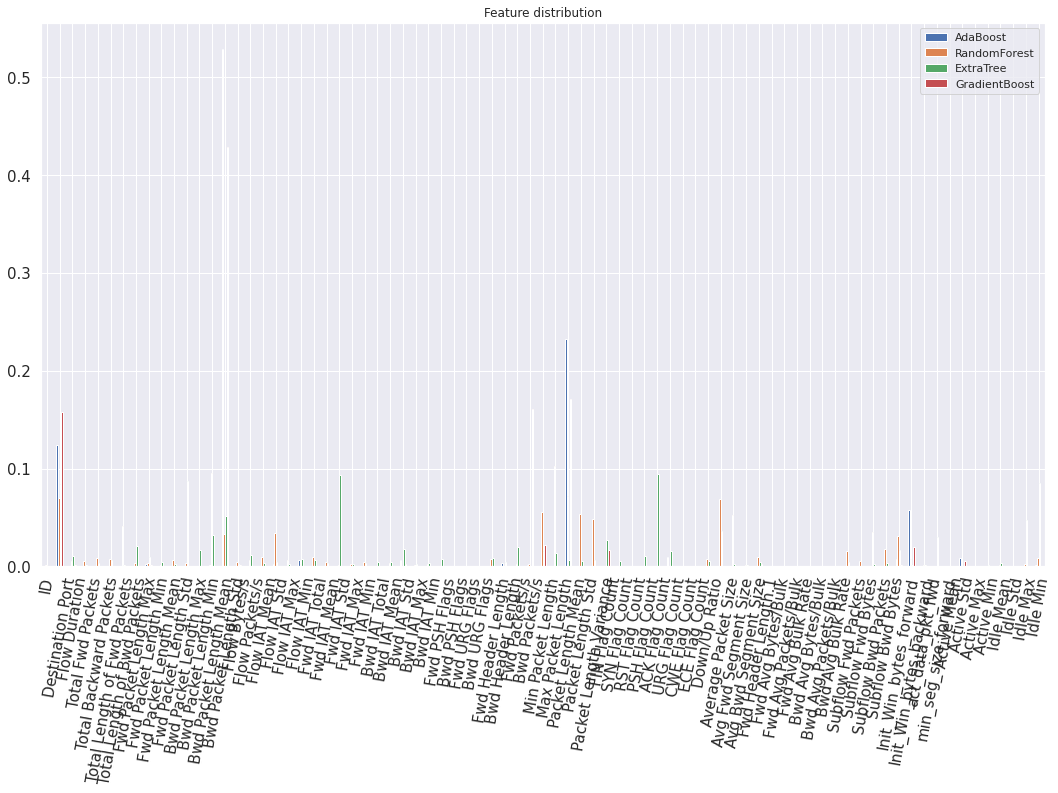

In [32]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

graph = feature_df.plot.bar(figsize = (18, 10), title = 'Feature distribution', grid=True, legend=True, fontsize = 15, 
                            xticks=feature_df.index)
graph.set_xticklabels(feature_df.features, rotation = 80)

In [33]:
a_f = feature_df.nlargest(12, 'AdaBoost')
e_f = feature_df.nlargest(12, 'ExtraTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

In [34]:
result = pd.concat([a_f, e_f, g_f, r_f])
result = result.drop_duplicates() 
result

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
14,Bwd Packet Length Std,5.292352e-01,0.033025,0.051070,4.286091e-01
41,Packet Length Mean,2.327576e-01,0.072419,0.006357,1.716090e-01
1,Destination Port,1.237538e-01,0.070160,0.084524,1.577045e-01
68,Init_Win_bytes_backward,5.808180e-02,0.008050,0.001639,1.991416e-02
49,URG Flag Count,9.780654e-03,0.000653,0.016059,3.595962e-05
72,Active Std,8.738818e-03,0.000007,0.000567,5.092158e-03
67,Init_Win_bytes_forward,7.210370e-03,0.031421,0.017167,1.243682e-03
20,Flow IAT Min,6.477720e-03,0.002644,0.007409,6.359145e-04
28,Bwd IAT Std,6.081418e-03,0.000771,0.017524,1.998912e-03
36,Bwd Header Length,3.924696e-03,0.000457,0.004749,2.018746e-06


**MACHINE LEARNING MODELS**

In [36]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**METRICS**

In [38]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8476427862322534

Model Accuracy:
 0.8480354791767722

Confusion matrix:
 [[42529  4922]
 [14815 67613]]

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81     47451
           1       0.93      0.82      0.87     82428

    accuracy                           0.85    129879
   macro avg       0.84      0.86      0.84    129879
weighted avg       0.86      0.85      0.85    129879



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9993301455728311

Model Accuracy:
 1.0

Confusion matrix:
 [[47451     0]
 [    0 82428]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     47451
           1       1.00      1.00      1.00  

**FINAL** **REPORT**

In [39]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.5172772208620132

Confusion matrix:
 [[ 6954  8917]
 [11982 15441]]

Classification report:
               precision    recall  f1-score   support

           0       0.37      0.44      0.40     15871
           1       0.63      0.56      0.60     27423

    accuracy                           0.52     43294
   macro avg       0.50      0.50      0.50     43294
weighted avg       0.54      0.52      0.52     43294



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.5384579849401765

Confusion matrix:
 [[ 5744 10127]
 [ 9855 17568]]

Classification report:
               precision    recall  f1-score   support

           0       0.37      0.36      0.37     15871
           1       0.63      0.64      0.64     27423

    accuracy                           0.54     43294
   macro avg     